In [8]:
run = 'E1154'
exposure = 'None'

In [9]:
from lsst.daf.butler import Butler
import pylab
import traceback
butler = Butler('embargo_new', collections=['LSSTCam/raw/all', 'LSSTCam/calib/unbounded'])

In [10]:
sensor="R01_S11"
detector=list(butler.registry.queryDimensionRecords("detector",instrument='LSSTCam',where=f"detector.full_name='{sensor}'"))[0].id
detector

4

In [11]:
collections=butler.registry.queryCollections(f'*/ptc*{run}*')

In [12]:
if exposure == 'None':
    exposures = list(butler.registry.queryDimensionRecords("exposure", 
                    where=f"exposure.science_program='{run}' and instrument='LSSTCam' and exposure.observation_reason='flat' and exposure.observation_type='flat'"))
else:
    exposure = [ exposure ]

2024093000424


Traceback (most recent call last):
  File "/tmp/ipykernel_30278/2603000309.py", line 3, in <module>
    photodiode = butler.get('photodiode', collections=collections,detector=detector, exposure=anexposure.id)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/gb419f0f6c8+f2441805f1/python/lsst/daf/butler/direct_butler/_direct_butler.py", line 1170, in get
    return self._datastore.get(ref, parameters=parameters, storageClass=storageClass)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/gb419f0f6c8+f2441805f1/python/lsst/daf/butler/datastores/fileDatastore.py", line 2057, in get
    return get_dataset_as_python_object_from_get_info(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/lsst/soft

2024093000895


Traceback (most recent call last):
  File "/tmp/ipykernel_30278/2603000309.py", line 3, in <module>
    photodiode = butler.get('photodiode', collections=collections,detector=detector, exposure=anexposure.id)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/gb419f0f6c8+f2441805f1/python/lsst/daf/butler/direct_butler/_direct_butler.py", line 1162, in get
    ref = self._findDatasetRef(
          ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/gb419f0f6c8+f2441805f1/python/lsst/daf/butler/direct_butler/_direct_butler.py", line 916, in _findDatasetRef
    raise DatasetNotFoundError(
lsst.daf.butler._exceptions.DatasetNotFoundError: Dataset photodiode with data ID {instrument: 'LSSTCam', exposure: 2024093000895} could not be found in collections ['u/lsstccs/ptc_E1154_w_2024

Text(0, 0.5, 'CURRENT')

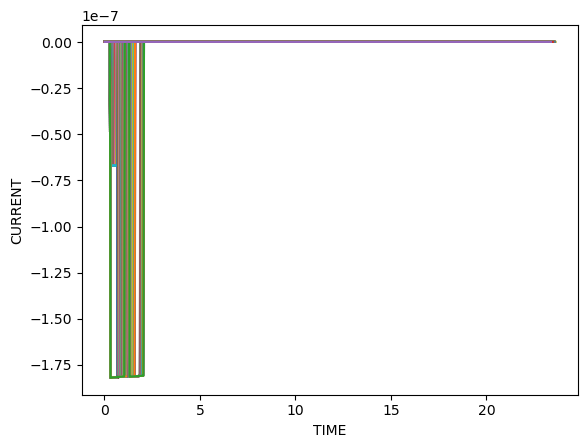

In [13]:
for anexposure in list(exposures)[::]:
    try:
        photodiode = butler.get('photodiode', collections=collections,detector=detector, exposure=anexposure.id)
        table = photodiode.toTable()[0]
        pylab.plot(table['TIME'].T, table['CURRENT'].T,"-")     ### I think there is a bug in to_Table
    except:
        print(anexposure.id)
        traceback.print_exc()
pylab.xlabel('TIME')
pylab.ylabel('CURRENT')

Traceback (most recent call last):
  File "/tmp/ipykernel_30278/830869165.py", line 3, in <module>
    photodiode = butler.get('photodiode', collections=collections, detector=detector, exposure=anexposure.id)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/gb419f0f6c8+f2441805f1/python/lsst/daf/butler/direct_butler/_direct_butler.py", line 1162, in get
    ref = self._findDatasetRef(
          ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/gb419f0f6c8+f2441805f1/python/lsst/daf/butler/direct_butler/_direct_butler.py", line 916, in _findDatasetRef
    raise DatasetNotFoundError(
lsst.daf.butler._exceptions.DatasetNotFoundError: Dataset photodiode with data ID {instrument: 'LSSTCam', exposure: 2024093000895} could not be found in collections ['u/lsstccs/ptc_E1154_w_202

Text(0, 0.5, 'INTEGRATED CURRENT')

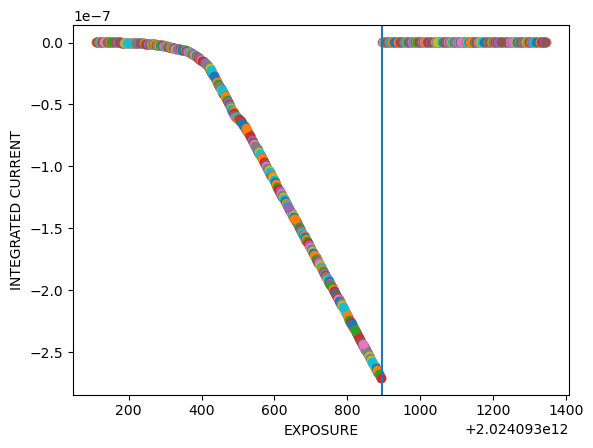

In [14]:
for anexposure in list(exposures)[::]:
    try:
        photodiode = butler.get('photodiode', collections=collections, detector=detector, exposure=anexposure.id)
        table = photodiode.toTable()[0]
        pylab.scatter( photodiode.getMetadata()['EXPOSURE'], photodiode.integrate() )
    except:
        pylab.axvline(anexposure.id)
        traceback.print_exc()
pylab.xlabel('EXPOSURE')
pylab.ylabel('INTEGRATED CURRENT')